<a id="EDA-work"></a>
### EDA Notebook

This notebook is working through the initial exploratory data analysis for my dataset using television advertising campaign and sales information. Already, as I began my EDA, I realized I needed to pull the data in a different way to be workable in python. 

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

In [17]:
tv = pd.read_csv('/Users/hannah.toohey/Desktop/GA COURSE MATERIALS/FINAL PROJECT/MS_2017_fulldataset.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
tv.head()

,ACCESS_CODE,STATION_CODE,LENGTH,PROGRAM,AFFILIATE,MARKET,AIR_TYPE,DATE_AIRED,TIME_AIRED,SPOTS_RAN,...,EFF_DATE3,EFF_DATE4,T65_ED1,T65_ED2,EINQ_BD_SA,EINQ_SALE,EINQ_PD_BD,EINQ_PD_SL,AGE_THRESHOLD_CRPER,EINQ
0,CAR2,ACHW,120,N/A,NWK,Network,Network,11/20/17,01:37P,1,...,1,0,0,0,0,0,0,0,0.00%,21
1,CAR2,ACHW,120,N/A,NWK,Network,Network,11/21/17,01:39P,1,...,0,2,1,1,0,1,0,1,5.00%,29
2,CAR2,AVIE,120,N/A,NWK,Network,Network,7/26/17,11:51A,1,...,0,1,0,0,0,2,0,1,0.00%,40
3,CAR2,AVIE,120,N/A,NWK,Network,Network,8/1/17,11:54A,1,...,1,1,0,0,0,1,0,1,0.00%,27
4,CAR2,AVIE,120,N/A,NWK,Network,Network,8/7/17,11:50A,1,...,0,1,3,4,0,0,0,0,16.67%,19


In [19]:
tv.columns

Index(['ACCESS_CODE', 'STATION_CODE', 'LENGTH', 'PROGRAM', 'AFFILIATE',
       'MARKET', 'AIR_TYPE', 'DATE_AIRED', 'TIME_AIRED', 'SPOTS_RAN',
       'CG_SPEND', 'TOT_CALL', 'CPC', 'LEADS', 'AGNT_OFFLD', 'CPL', 'MSLTCPER',
       'AGE_THRESHOLD', 'THRESHOLD_PER', 'TOT_SALES', 'CPS', 'CR',
       'TOT_P_SALE', 'CPPS', '$_SPENT', '6411LEADS', '6511LEADS', '6669LEAD',
       '70LEAD', 'TOT_TRAN', 'EFF_DATE1', 'EFF_DATE2', 'EFF_DATE3',
       'EFF_DATE4', 'T65_ED1', 'T65_ED2', 'EINQ_BD_SA', 'EINQ_SALE',
       'EINQ_PD_BD', 'EINQ_PD_SL', 'AGE_THRESHOLD_CRPER', 'EINQ'],
      dtype='object')

Dropping columns that are not helpful or are redundant (eg CG_SPEND and $_SPENT)

In [20]:
tv.drop(['$_SPENT','EFF_DATE1','EFF_DATE2','EFF_DATE3','EFF_DATE4','T65_ED1','T65_ED2','EINQ_BD_SA','EINQ_SALE','EINQ_PD_BD','EINQ_PD_SL'], axis=1, inplace=True)

In [21]:
tv.shape

(53943, 31)

In [22]:
tv.dtypes

ACCESS_CODE             object
STATION_CODE            object
LENGTH                   int64
PROGRAM                 object
AFFILIATE               object
MARKET                  object
AIR_TYPE                object
DATE_AIRED              object
TIME_AIRED              object
SPOTS_RAN                int64
CG_SPEND               float64
TOT_CALL                object
CPC                     object
LEADS                    int64
AGNT_OFFLD               int64
CPL                     object
MSLTCPER                object
AGE_THRESHOLD            int64
THRESHOLD_PER           object
TOT_SALES                int64
CPS                     object
CR                      object
TOT_P_SALE               int64
CPPS                    object
6411LEADS                int64
6511LEADS                int64
6669LEAD                 int64
70LEAD                   int64
TOT_TRAN                 int64
AGE_THRESHOLD_CRPER     object
EINQ                     int64
dtype: object

In [56]:
tv.loc[:,:].isnull().sum()

ACCESS_CODE            0
STATION_CODE           0
LENGTH                 0
PROGRAM                0
AFFILIATE              0
MARKET                 0
AIR_TYPE               0
DATE_AIRED             0
TIME_AIRED             0
SPOTS_RAN              0
CG_SPEND               0
TOT_CALL               0
CPC                    0
LEADS                  0
AGNT_OFFLD             0
CPL                    0
MSLTCPER               0
AGE_THRESHOLD          0
THRESHOLD_PER          0
TOT_SALES              0
CPS                    0
CR                     0
TOT_P_SALE             0
CPPS                   0
TOT_TRAN               0
AGE_THRESHOLD_CRPER    0
EINQ                   0
AGEBAND                0
dtype: int64

No missing values!

In [23]:
tv.loc[:,'AIR_TYPE'].value_counts()

Spot                              20363
Cable                             20344
Other                              7294
Local Cable                        3316
Network                            1346
Satellite                           760
Syndication                         519
Regional Cable                        1
Name: AIR_TYPE, dtype: int64

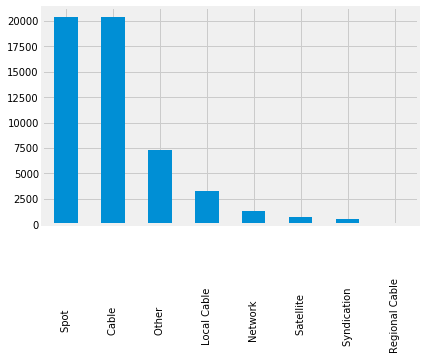

In [25]:
tv.loc[:,'AIR_TYPE'].value_counts().plot(kind='bar');

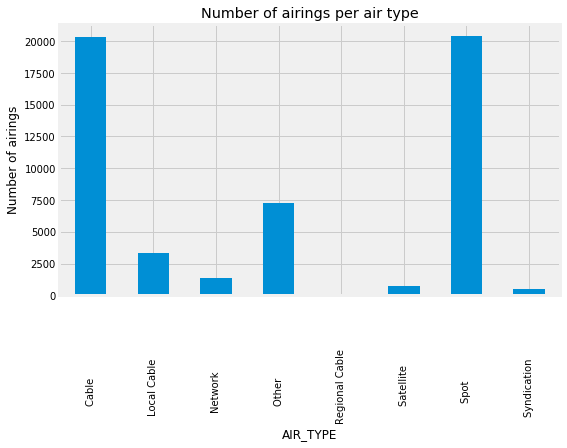

In [26]:
tv.loc[:, 'AIR_TYPE'].value_counts().sort_index().plot(kind='bar', figsize=(8,5));
plt.xlabel('AIR_TYPE');
plt.ylabel('Number of airings');
plt.title('Number of airings per air type');

In [27]:
tv.describe()

,LENGTH,SPOTS_RAN,CG_SPEND,LEADS,AGNT_OFFLD,AGE_THRESHOLD,TOT_SALES,TOT_P_SALE,6411LEADS,6511LEADS,6669LEAD,70LEAD,TOT_TRAN,EINQ
count,53943.000000,53943.0,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,95.832267,1.0,1180.750797,4.850509,0.017407,1.085368,0.171348,0.143262,1.616336,0.339785,0.930297,1.964648,1.014348,0.948279
std,29.427890,0.0,3577.088990,16.292625,0.391141,3.627552,0.729639,0.629960,5.418953,1.237290,3.212581,7.140932,3.837517,3.145012
min,60.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,1.0,41.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,1.0,207.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,1.0,1015.670000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,120.000000,1.0,50960.980000,435.000000,36.000000,80.000000,26.000000,23.000000,117.000000,28.000000,84.000000,211.000000,155.000000,66.000000


In [28]:
tv.loc[:,'CG_SPEND'].sum()

63693240.23000899

In [29]:
tv.loc[:,'CG_SPEND'].mean()

1180.7507967671243

In [30]:
tv.loc[:,'CG_SPEND'].median()

207.75

In [32]:
tv.loc[:,'CG_SPEND'].mode()

0    0.0
dtype: float64

In [33]:
y = tv.loc[:,'CG_SPEND']
y

0        37571.63
1        37571.63
2        26385.36
3        26385.36
4        26385.36
5        36859.73
6        36859.73
7        36859.73
8        36859.73
9        36859.73
10       36859.73
11       36859.73
12       26222.86
13       26222.86
14       28642.01
15       28642.01
16       28642.01
17       48999.81
18       41491.21
19       48999.81
20       48999.81
21       41491.21
22       48999.81
23       48999.81
24       48999.81
25       41491.21
26       41491.21
27       48999.81
28       41491.21
29       41491.21
           ...   
53913      258.54
53914      258.54
53915      258.54
53916      258.54
53917      258.54
53918      258.54
53919      258.54
53920      258.54
53921      258.54
53922      258.54
53923        0.00
53924        0.00
53925      258.54
53926        0.00
53927      258.54
53928      258.54
53929      258.54
53930      258.54
53931      258.54
53932      258.54
53933        0.00
53934        0.00
53935        0.00
53936        0.00
53937     

In [34]:
y_pred = y.mean()
y_pred

1180.7507967671243

In [35]:
mse = ((y - y_pred)**2).mean()
mse

12795328.438638711

In [36]:
tv.corr()

,LENGTH,SPOTS_RAN,CG_SPEND,LEADS,AGNT_OFFLD,AGE_THRESHOLD,TOT_SALES,TOT_P_SALE,6411LEADS,6511LEADS,6669LEAD,70LEAD,TOT_TRAN,EINQ
LENGTH,1.000000,NaN,0.060259,0.075286,-0.012927,0.068633,0.047609,0.043248,0.070642,0.066805,0.070764,0.074801,0.062739,0.067617
SPOTS_RAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CG_SPEND,0.060259,NaN,1.000000,0.906600,0.131445,0.831993,0.676024,0.651090,0.871018,0.798021,0.864324,0.880521,0.856961,0.856285
LEADS,0.075286,NaN,0.906600,1.000000,0.123344,0.919413,0.759686,0.731777,0.958205,0.883136,0.956002,0.971370,0.929562,0.936529
AGNT_OFFLD,-0.012927,NaN,0.131445,0.123344,1.000000,0.109657,0.084517,0.086633,0.126238,0.128745,0.123343,0.107823,0.088104,0.067252
AGE_THRESHOLD,0.068633,NaN,0.831993,0.919413,0.109657,1.000000,0.725350,0.704819,0.965309,0.852573,0.856735,0.832068,0.821311,0.883421
TOT_SALES,0.047609,NaN,0.676024,0.759686,0.084517,0.725350,1.000000,0.966958,0.746283,0.691214,0.734351,0.716897,0.707283,0.719112
TOT_P_SALE,0.043248,NaN,0.651090,0.731777,0.086633,0.704819,0.966958,1.000000,0.720407,0.669838,0.706515,0.689048,0.677473,0.696178
6411LEADS,0.070642,NaN,0.871018,0.958205,0.126238,0.965309,0.746283,0.720407,1.000000,0.849189,0.895106,0.877604,0.871874,0.889007
6511LEADS,0.066805,NaN,0.798021,0.883136,0.128745,0.852573,0.691214,0.669838,0.849189,1.000000,0.836838,0.820847,0.815635,0.832052


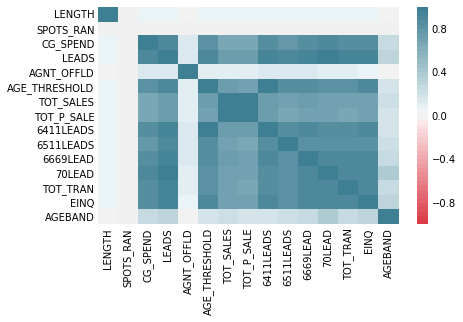

In [48]:
sns.heatmap(tv.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 220, n=50))

A lot of these features appear to be correlated, so it will be important to check out which have collinearity issues before further analysis, such as sales and paid sales.

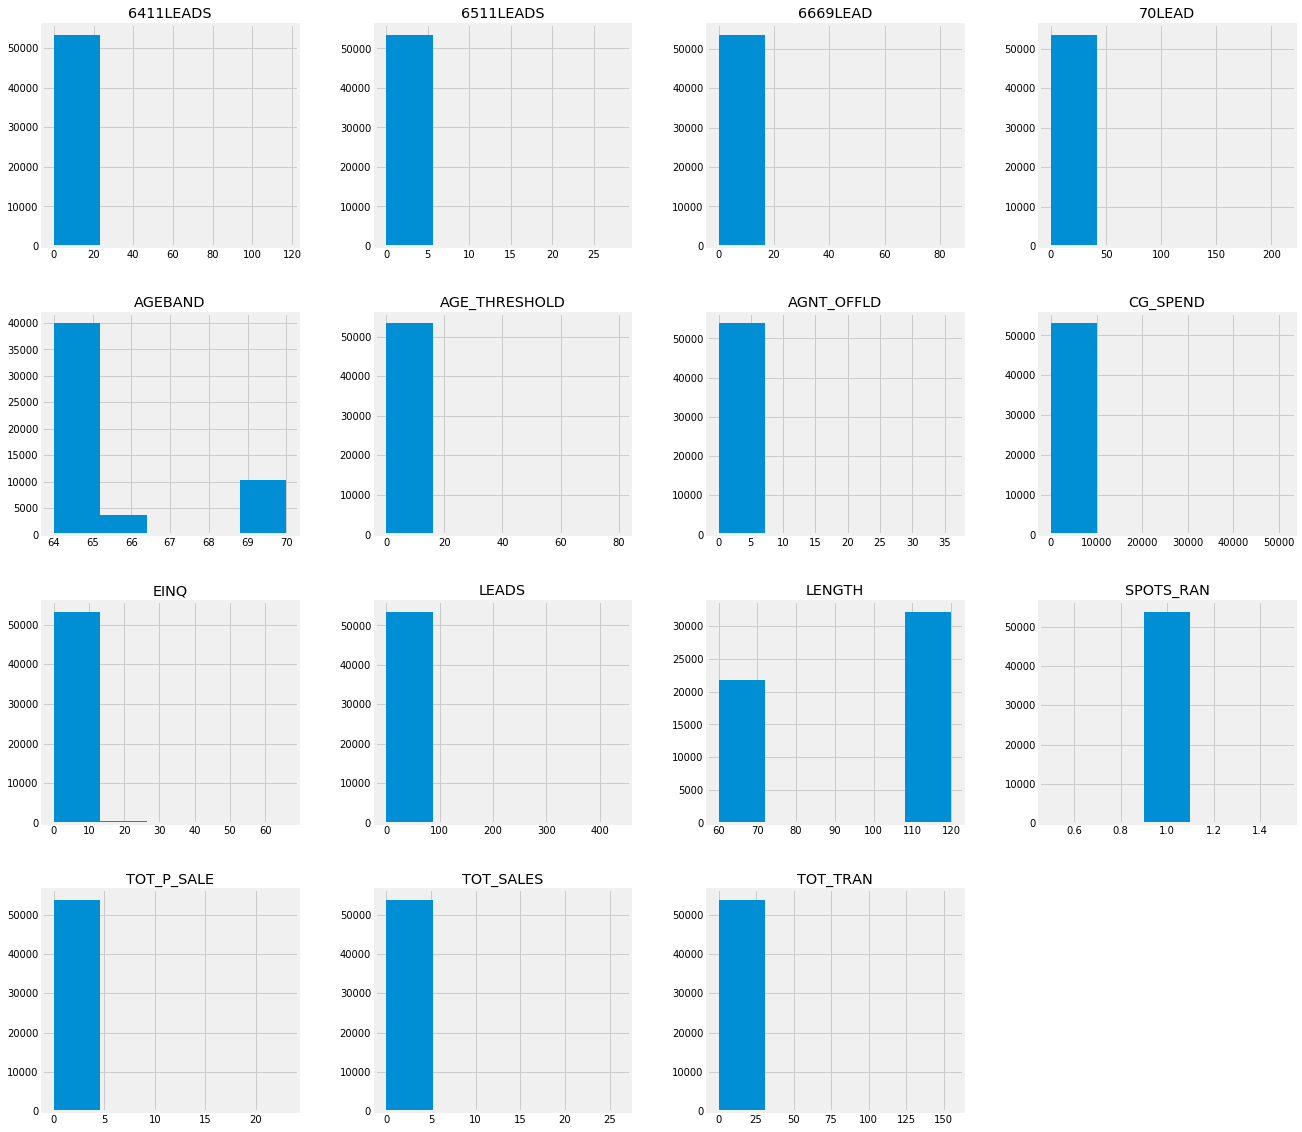

In [49]:
tv.hist(figsize=(20, 20), bins=5);

Need to convert the separate age band columns into one column that finds the age using idmax

In [39]:
ages = tv.loc[:,['6411LEADS','6511LEADS','6669LEAD','70LEAD']]
ages

,6411LEADS,6511LEADS,6669LEAD,70LEAD
0,26,13,13,35
1,44,7,20,56
2,42,10,28,72
3,42,11,23,50
4,23,10,24,43
5,38,9,29,79
6,48,17,45,117
7,29,8,25,84
8,30,7,32,61
9,8,2,4,15


In [40]:
agebands = ages.idxmax(axis=1)
agebands

0           70LEAD
1           70LEAD
2           70LEAD
3           70LEAD
4           70LEAD
5           70LEAD
6           70LEAD
7           70LEAD
8           70LEAD
9           70LEAD
10          70LEAD
11          70LEAD
12          70LEAD
13          70LEAD
14          70LEAD
15          70LEAD
16          70LEAD
17          70LEAD
18          70LEAD
19          70LEAD
20          70LEAD
21          70LEAD
22       6411LEADS
23          70LEAD
24          70LEAD
25          70LEAD
26          70LEAD
27          70LEAD
28          70LEAD
29          70LEAD
           ...    
53913    6411LEADS
53914    6411LEADS
53915     6669LEAD
53916    6411LEADS
53917    6411LEADS
53918    6411LEADS
53919    6411LEADS
53920    6411LEADS
53921    6411LEADS
53922    6411LEADS
53923    6411LEADS
53924    6411LEADS
53925    6411LEADS
53926    6411LEADS
53927    6411LEADS
53928    6411LEADS
53929       70LEAD
53930    6411LEADS
53931    6411LEADS
53932     6669LEAD
53933    6411LEADS
53934    641

In [41]:
tv['AGEBAND']=agebands

In [42]:
tv.loc[:, 'AGEBAND'] = tv.loc[:, 'AGEBAND'].map({'6411LEADS': 64, '6511LEADS': 65, '6669LEAD':66,'70LEAD':70})

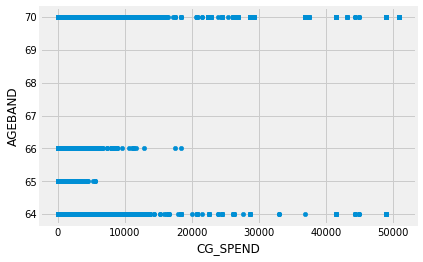

In [43]:
tv.plot(kind='scatter', x='CG_SPEND',y='AGEBAND')

In [53]:
tv.drop(['6411LEADS','6511LEADS','6669LEAD','70LEAD'], axis=1, inplace=True)

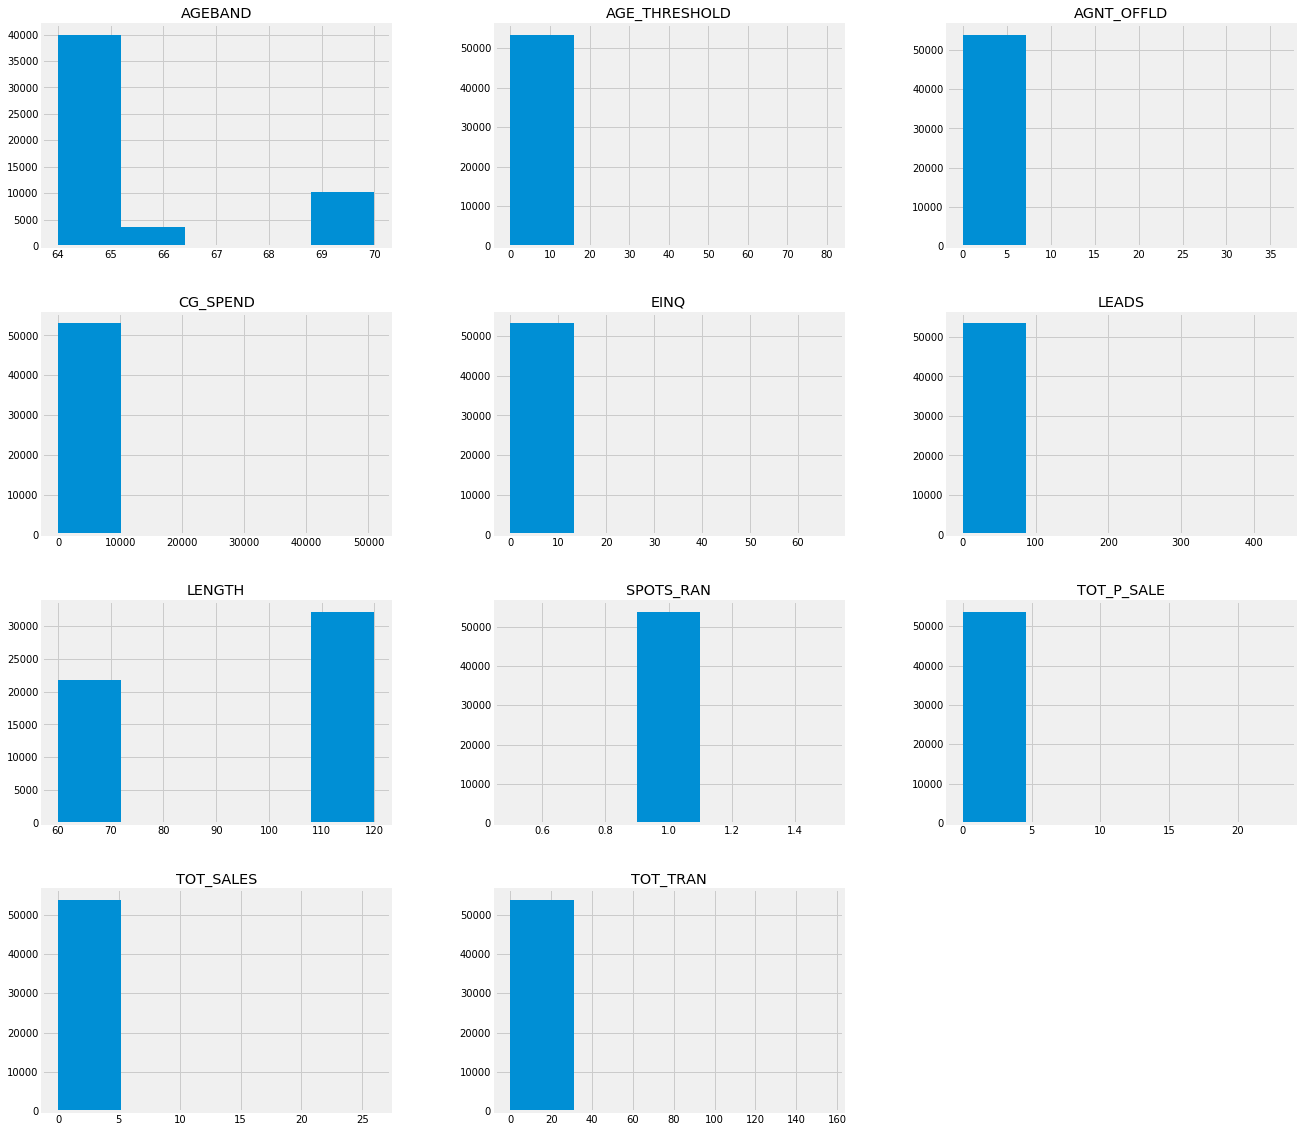

In [54]:
tv.hist(figsize=(20, 20), bins=5);

We will need to create lots of dummy variables for this model to work!

<a id="next-steps"></a>
## Next Steps
---

- **Continue to clean up fields needing dummy variables:** For example, need to code length to be either is60 or is120, rather than a continuous field
- **Address collinearity:** Most notably for sales and paid sales. All other instances have been dropped at beginning of EDA

In [55]:
tv.columns

Index(['ACCESS_CODE', 'STATION_CODE', 'LENGTH', 'PROGRAM', 'AFFILIATE',
       'MARKET', 'AIR_TYPE', 'DATE_AIRED', 'TIME_AIRED', 'SPOTS_RAN',
       'CG_SPEND', 'TOT_CALL', 'CPC', 'LEADS', 'AGNT_OFFLD', 'CPL', 'MSLTCPER',
       'AGE_THRESHOLD', 'THRESHOLD_PER', 'TOT_SALES', 'CPS', 'CR',
       'TOT_P_SALE', 'CPPS', 'TOT_TRAN', 'AGE_THRESHOLD_CRPER', 'EINQ',
       'AGEBAND'],
      dtype='object')